# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from math import sqrt
plt.style.use('fivethirtyeight')

In [2]:
df_train = pd.read_csv('./Data/AdvWorksCusts.csv')
AW_BikeBuyer = pd.read_csv('./Data/AW_BikeBuyer.csv')
df_test = pd.read_csv('./Data/AW_test.csv')

In [3]:
df_train.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

In [5]:
df_train.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [6]:
df_train = pd.merge(df_train, AW_BikeBuyer, on='CustomerID')
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,16739,16740,16741,16742,16743,16744,16745,16746,16747,16748
CustomerID,11000,11001,11002,11003,11004,11005,11006,11007,11008,11009,...,29473,29474,29475,29476,29477,29478,29479,29480,29481,29482
Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth,Julio,Janet,Marco,Rob,Shannon,...,Carmen,Jaime,Jared,Elizabeth,Neil,Darren,Tommy,Nina,Ivan,Clayton
MiddleName,V,L,NaN,NaN,NaN,NaN,G,NaN,NaN,C,...,J,B,A,NaN,N,D,L,W,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson,Ruiz,Alvarez,Mehta,Verhoff,Carlson,...,Subram,Raje,Ward,Bradley,Ruiz,Carlson,Tang,Raji,Suri,Zhang
Suffix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle,7305 Humphrey Drive,2612 Berry Dr,942 Brook Street,624 Peabody Road,3839 Northgate Road,...,6467 Buena Vista,Potsdamer Straße 646,Erftplatz 876,Nonnendamm 2,P.O. Box 9178,5240 Premier Pl.,"111, rue Maillard",9 Katherine Drive,Knaackstr 4,"1080, quai de Grenelle"
AddressLine2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong,East Brisbane,Matraville,Warrnambool,Bendigo,Hervey Bay,...,Oxford,Saarbrücken,Hamburg,Hamburg,London,Stoke-on-Trent,Versailles,London,Hof,Saint Ouen
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales,Queensland,New South Wales,Victoria,Victoria,Queensland,...,England,Saarland,Hamburg,Hamburg,England,England,Yveline,England,Bayern,Charente-Maritime


In [7]:
##convert birthDate to datetime format
df_train['BirthDate'] = pd.to_datetime(df_train['BirthDate'])
df_test['BirthDate'] = pd.to_datetime(df_test['BirthDate'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16749 entries, 0 to 16748
Data columns (total 24 columns):
CustomerID              16749 non-null int64
Title                   88 non-null object
FirstName               16749 non-null object
MiddleName              9696 non-null object
LastName                16749 non-null object
Suffix                  2 non-null object
AddressLine1            16749 non-null object
AddressLine2            281 non-null object
City                    16749 non-null object
StateProvinceName       16749 non-null object
CountryRegionName       16749 non-null object
PostalCode              16749 non-null object
PhoneNumber             16749 non-null object
BirthDate               16749 non-null datetime64[ns]
Education               16749 non-null object
Occupation              16749 non-null object
Gender                  16749 non-null object
MaritalStatus           16749 non-null object
HomeOwnerFlag           16749 non-null int64
NumberCarsOwned      

In [8]:
df_train['birth_year'] = df_train['BirthDate'].map(lambda value: value.year)
df_train['Age'] = 1998 - df_train['birth_year']
df_test['birth_year'] = df_test['BirthDate'].map(lambda value: value.year)
df_test['Age'] = 1998 - df_test['birth_year']
df_train.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [9]:
print('Shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates(subset='CustomerID', keep='last')
print('Shape after removing duplicate rows:', df_train.shape)

Shape before removing duplicate rows: (16749, 26)
Shape after removing duplicate rows: (16749, 26)


In [10]:
## check for number of missing values
df_train.isnull().sum()

CustomerID                  0
Title                   16661
FirstName                   0
MiddleName               7053
LastName                    0
Suffix                  16747
AddressLine1                0
AddressLine2            16468
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
BikeBuyer                   0
birth_year                  0
Age                         0
dtype: int64

In [11]:
# drop columns with too many missing values
df_train.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'birth_year', 'Age'],
      dtype='object')

In [12]:
print('train shape before droping features:', df_train.shape)
print('test shape before droping features:',df_test.shape)
df_train.dropna(axis=1, inplace=True)
df_test.dropna(axis=1, inplace=True)
print('train shape after droping features:',df_train.shape)
print('test shape after droping features:', df_test.shape)

train shape before droping features: (16749, 26)
test shape before droping features: (500, 25)
train shape after droping features: (16749, 22)
test shape after droping features: (500, 21)


In [13]:
df_train.head(2)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,birth_year,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,M,1,0,0,2,137947,0,1966,32
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,M,S,0,1,3,3,101141,1,1965,33


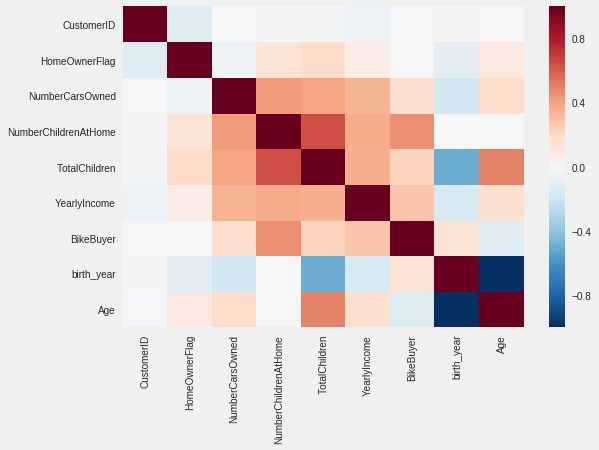

In [14]:
# show the correlation heatmap of the data to get a better sense of what we are looking at
sns.heatmap(df_train.corr())

In [15]:
## correlation among features
df_train.corr()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,birth_year,Age
CustomerID,1.000000,-0.126599,0.002115,-0.019848,-0.018416,-0.060852,-0.007816,0.010014,-0.010014
HomeOwnerFlag,-0.126599,1.000000,-0.053644,0.135171,0.188128,0.076076,0.001302,-0.109147,0.109147
NumberCarsOwned,0.002115,-0.053644,1.000000,0.424043,0.394739,0.344480,0.164617,-0.183488,0.183488
NumberChildrenAtHome,-0.019848,0.135171,0.424043,1.000000,0.647742,0.369181,0.457332,-0.003963,0.003963
TotalChildren,-0.018416,0.188128,0.394739,0.647742,1.000000,0.363084,0.233492,-0.492487,0.492487
YearlyIncome,-0.060852,0.076076,0.344480,0.369181,0.363084,1.000000,0.287978,-0.159733,0.159733
BikeBuyer,-0.007816,0.001302,0.164617,0.457332,0.233492,0.287978,1.000000,0.138414,-0.138414
birth_year,0.010014,-0.109147,-0.183488,-0.003963,-0.492487,-0.159733,0.138414,1.000000,-1.000000
Age,-0.010014,0.109147,0.183488,0.003963,0.492487,0.159733,-0.138414,-1.000000,1.000000


In [16]:
## correlation between features and response/target variable
df_train.corr()['BikeBuyer']

CustomerID             -0.007816
HomeOwnerFlag           0.001302
NumberCarsOwned         0.164617
NumberChildrenAtHome    0.457332
TotalChildren           0.233492
YearlyIncome            0.287978
BikeBuyer               1.000000
birth_year              0.138414
Age                    -0.138414
Name: BikeBuyer, dtype: float64

In [17]:
##birth year and age are the same thing. Hence, ther is need to remove the birth_year
df_train = df_train.drop('birth_year', axis=1)
df_test = df_test.drop('birth_year', axis=1)

In [18]:
df_train.head(2)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,0,32
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,1,33


In [19]:
### the null accuracy of the target/response variable
df_train['BikeBuyer'].value_counts(normalize=True)
## the null accuracy is 66%. i.e. 66% did not buy bike. We project to have an accuracy better than this

0    0.66798
1    0.33202
Name: BikeBuyer, dtype: float64

In [20]:
df_train.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'Age'],
      dtype='object')

In [21]:
## checking for categories
cat_col = ['City','StateProvinceName','CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique City 270
Number of unique StateProvinceName 52
Number of unique CountryRegionName 6
Number of unique Education 5
Number of unique Occupation 5
Number of unique Gender 2
Number of unique MaritalStatus 2
Number of unique HomeOwnerFlag 2
Number of unique NumberCarsOwned 5
Number of unique NumberChildrenAtHome 6
Number of unique TotalChildren 6
Number of unique Age 70


In [22]:
# unique features from each category
unique_cat_col = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
for cat in unique_cat_col:
    print(df_train[cat].unique())

['Australia' 'United States' 'Canada' 'Germany' 'United Kingdom' 'France']
['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
[1 0]
[0 1 4 2 3]
[0 3 5 4 1 2]
[2 3 0 5 4 1]
[32 33 30 34 35 19 20 53 52 51 50 21 23 22 49 48 18 47 46 45 44 25 43 42
 41 24 39 31 36 37 38 63 62 60 59 57 56 26 55 54 40 66 65 64 61 58 28 29
 27 68 67 72 74 88 71 70 69 76 87 86 78 77 85 82 81 75 79 73 80 83]


In [23]:
car_range = {0:'No car',1:'>=1 car',2:'>=1 car',3:'>=1 car',4:'>=1 car'}
children_range = {0:'No child',1:'>=1 child(ren)',2:'>=1 child(ren)',3:'>=1 child(ren)',4:'>=1 child(ren)',5:'>=1 child(ren)'}
total_children_range = {0:'No child',1:'>=1 child(ren)',2:'>=1 child(ren)',3:'>=1 child(ren)',4:'>=1 child(ren)',5:'>=1 child(ren)'}
age_range={18:'<=19',19:'<=19', 20:'<=29',21:'<=29',22:'<=29',23:'<=29',24:'<=29',25:'<=29',26:'<=29',27:'<=29',
           28:'<=29',29:'<=29', 30:'<=39',31:'<=39',32:'<=39',33:'<=39',34:'<=39',35:'<=39',36:'<=39',37:'<=39',
           38:'<=39',39:'<=39', 40:'<=49',41:'<=49',42:'<=49',43:'<=49',44:'<=49',45:'<=49',46:'<=49',47:'<=49',
           48:'<=49',49:'<=49', 50:'<=59',51:'<=59',52:'<=59',53:'<=59',54:'<=59',55:'<=59',56:'<=59',57:'<=59',
           58:'<=59',59:'<=59', 60:'<=89',61:'<=89',62:'<=89',63:'<=89',64:'<=89',65:'<=89',66:'<=89',67:'<=89',
           68:'<=89',69:'<=89', 70:'<=89',71:'<=89',72:'<=89',73:'<=89',74:'<=89',75:'<=89',76:'<=89',77:'<=89',
           78:'<=89',79:'<=89', 80:'<=89',81:'<=89',82:'<=89',83:'<=89',85:'<=89',86:'<=89',87:'<=89',88:'<=89'
          }
datasets=[df_train, df_test]
for dataset in datasets:
    dataset['Age']=dataset['Age'].replace(age_range)
    dataset['NumberCarsOwned'] = dataset['NumberCarsOwned'].replace(car_range)
    dataset['NumberChildrenAtHome'] = dataset['NumberChildrenAtHome'].replace(children_range)
    dataset['TotalChildren'] = dataset['TotalChildren'].replace(total_children_range)

In [24]:
df_train.head(3).T

,0,1,2
CustomerID,11000,11001,11002
FirstName,Jon,Eugene,Ruben
LastName,Yang,Huang,Torres
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land
City,Rockhampton,Seaford,Hobart
StateProvinceName,Queensland,Victoria,Tasmania
CountryRegionName,Australia,Australia,Australia
PostalCode,4700,3198,7001
PhoneNumber,1 (11) 500 555-0162,1 (11) 500 555-0110,1 (11) 500 555-0184
BirthDate,1966-04-08 00:00:00,1965-05-14 00:00:00,1965-08-12 00:00:00


# Visualizing Distributions

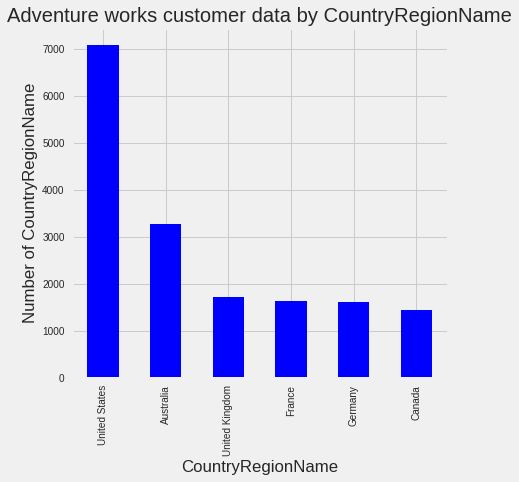

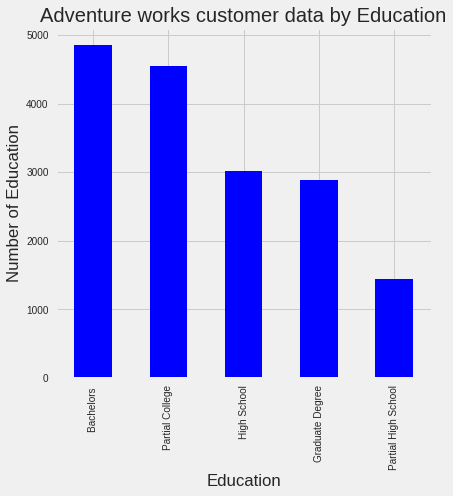

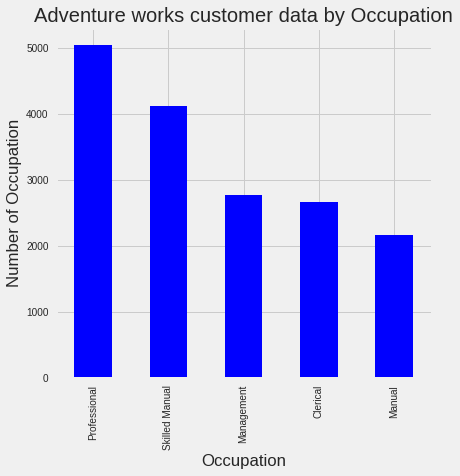

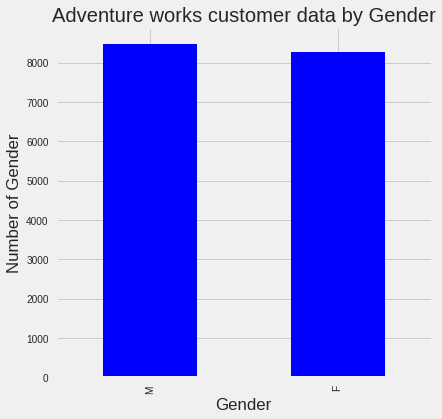

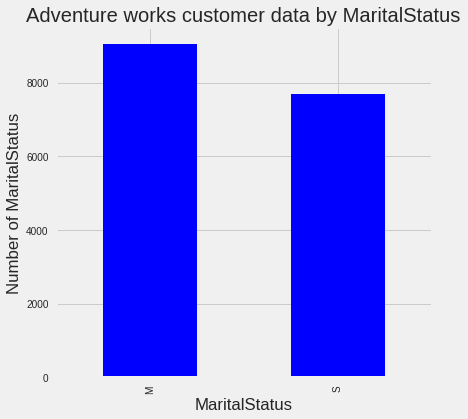

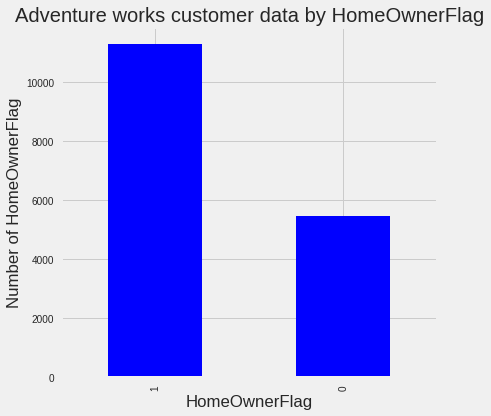

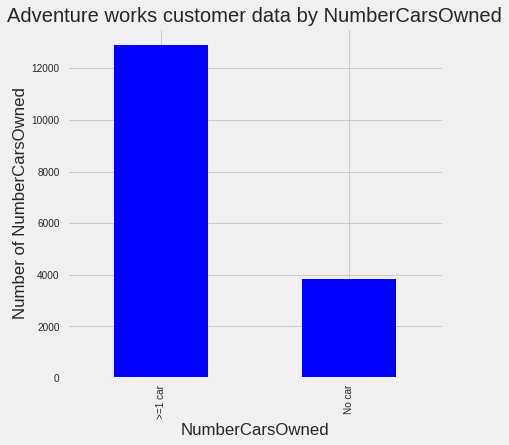

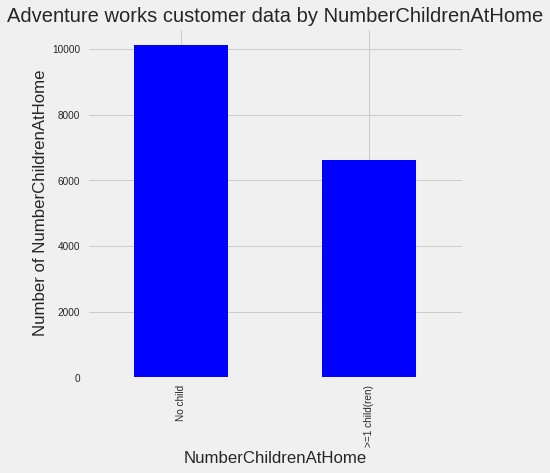

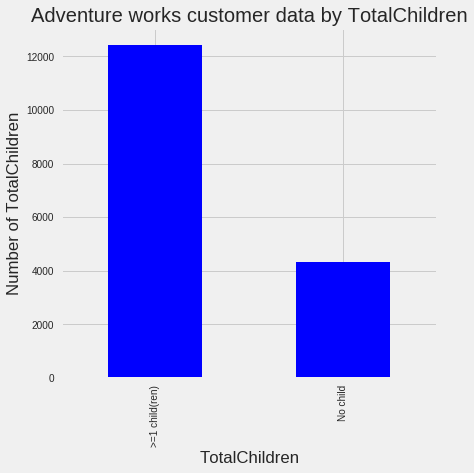

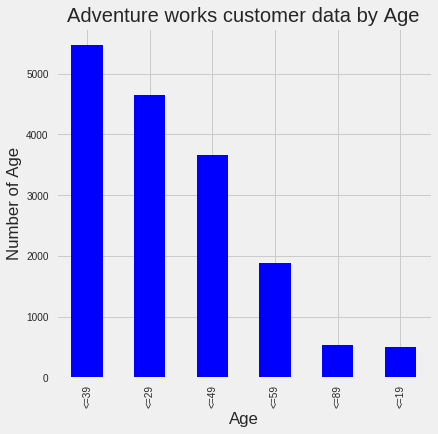

In [25]:
def plot_bars(df_train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df_train[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Adventure works customer data by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of ' + col)# Set text for y axis
        plt.show()
        
plot_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
plot_bars(df_train, plot_cols)    

# Categorical vs numeric variable

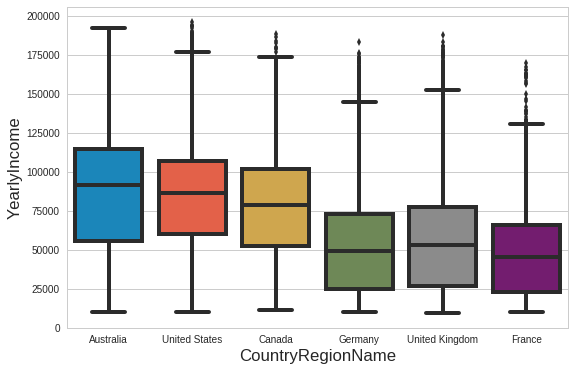

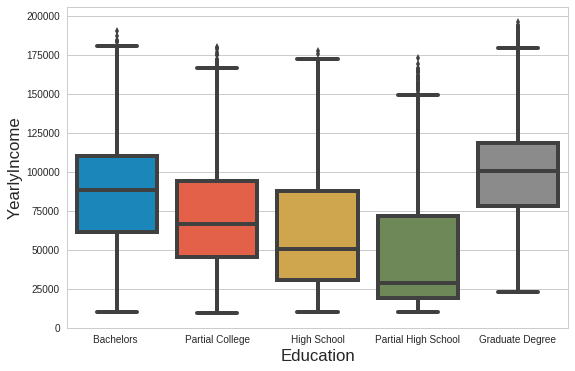

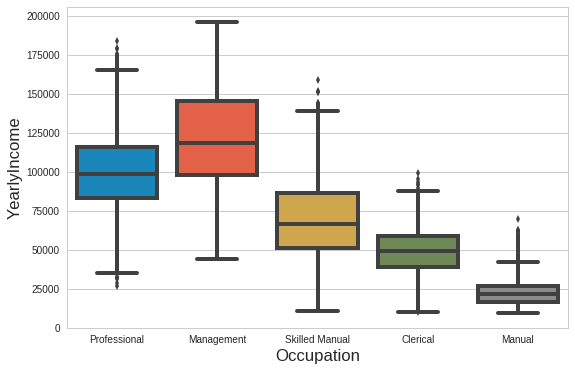

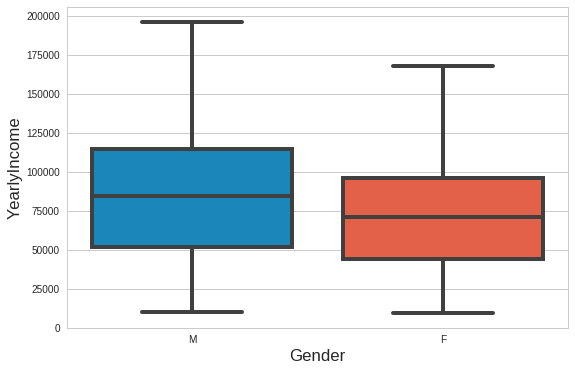

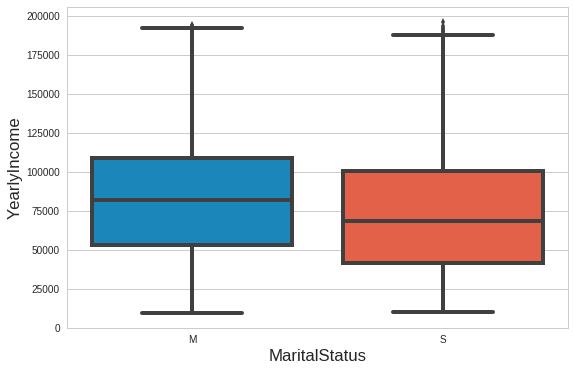

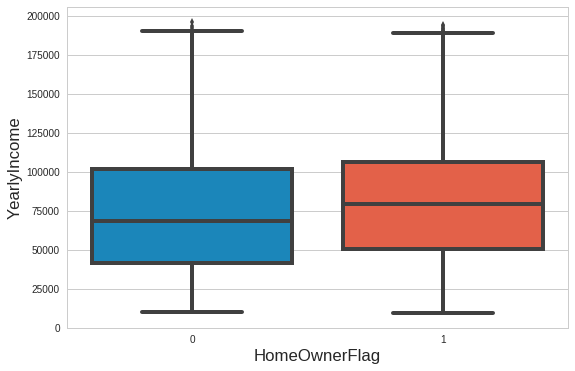

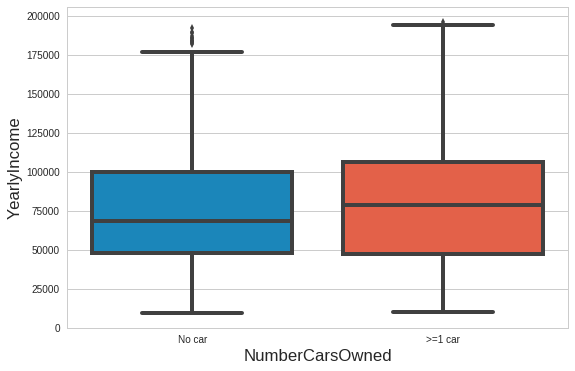

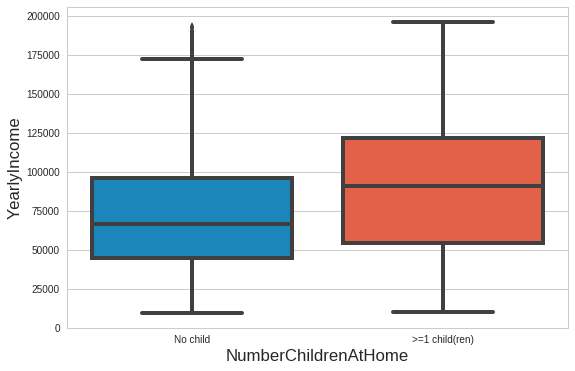

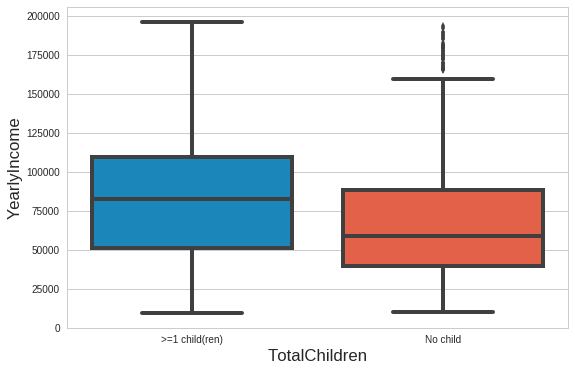

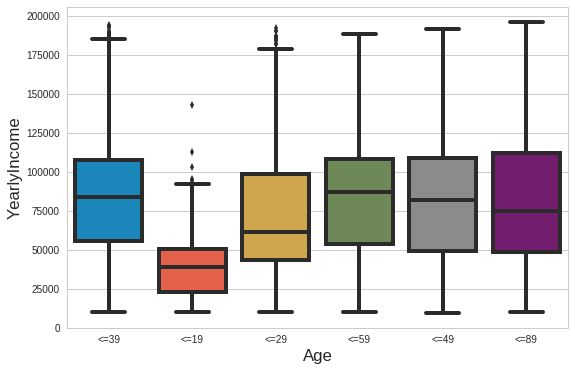

In [26]:
## relationship between the label (numeric variables) and the features (categorical variables)
def plot_box(df_train, cols, col_y = 'YearlyIncome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
plot_box(df_train, cat_cols)    

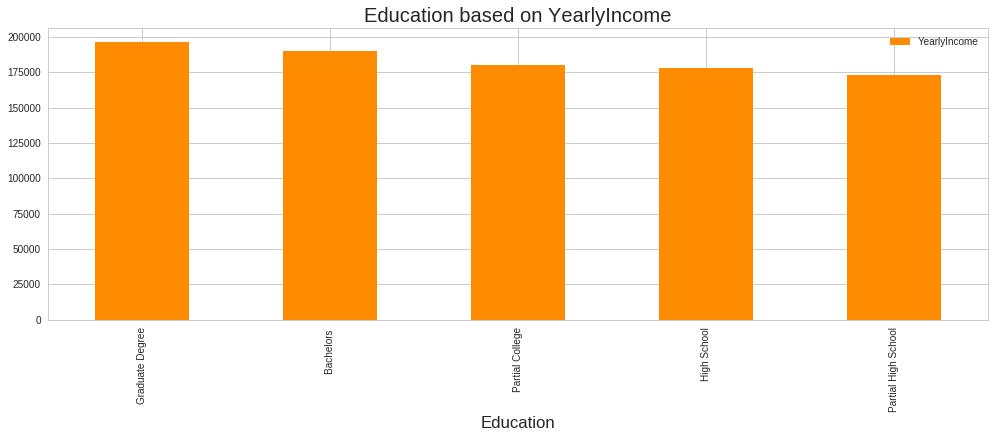

In [27]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('Education')[['YearlyIncome']].max().sort_values(
    'YearlyIncome', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Education based on YearlyIncome')

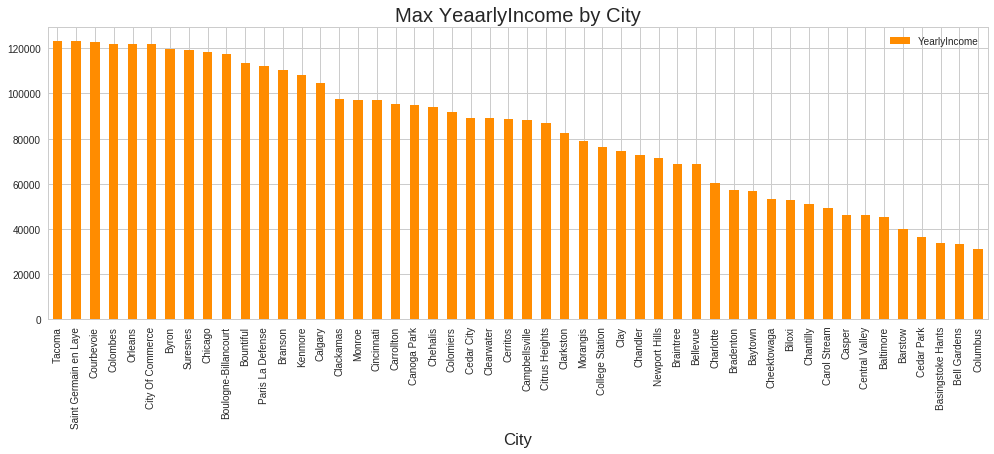

In [28]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('City')[['YearlyIncome']].max().sort_values(
    'YearlyIncome', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max YeaarlyIncome by City')

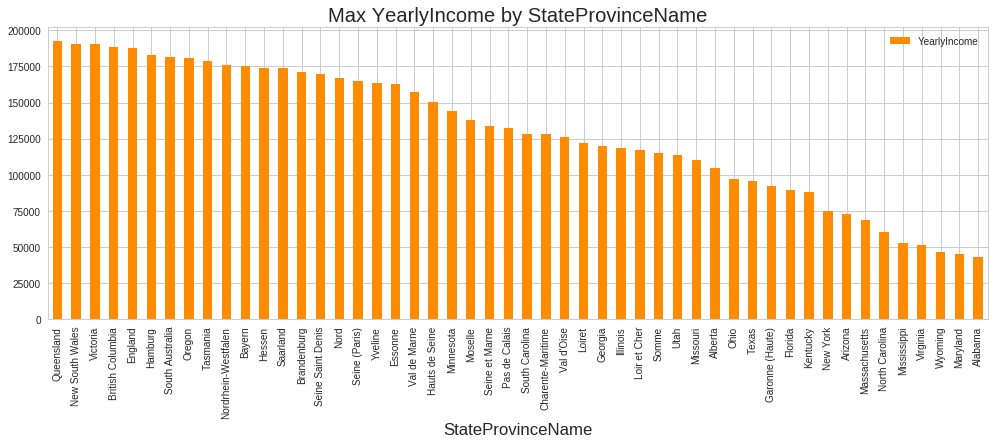

In [29]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('StateProvinceName')[['YearlyIncome']].max().sort_values(
    'YearlyIncome', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max YearlyIncome by StateProvinceName')

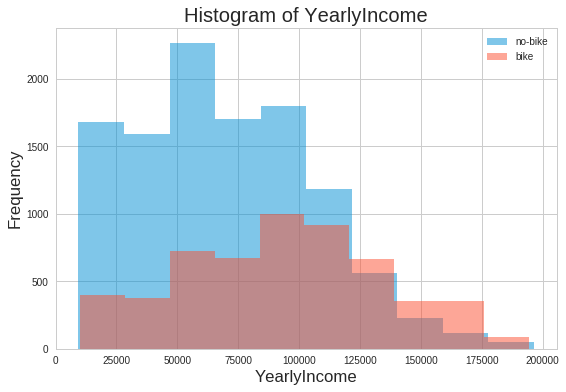

In [30]:
# get a histogram of the YearlyIncome vs target/response variable

col = 'YearlyIncome'
plt.hist(df_train[df_train['BikeBuyer']==0][col], 10, alpha=0.5, label='no-bike')
plt.hist(df_train[df_train['BikeBuyer']==1][col], 10, alpha=0.5, label='bike')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

In [31]:
df_train.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'Age'],
      dtype='object')

In [32]:
train_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 
                   'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'Age']
test_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 
                   'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome','Age']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

In [33]:
train_data.head(5)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Australia,Bachelors,Professional,M,M,1,No car,No child,>=1 child(ren),137947,0,<=39
1,Australia,Bachelors,Professional,M,S,0,>=1 car,>=1 child(ren),>=1 child(ren),101141,1,<=39
2,Australia,Bachelors,Professional,M,M,1,>=1 car,>=1 child(ren),>=1 child(ren),91945,0,<=39
3,Australia,Bachelors,Professional,F,S,0,>=1 car,No child,No child,86688,0,<=39
4,Australia,Bachelors,Professional,F,S,1,>=1 car,>=1 child(ren),>=1 child(ren),92771,1,<=39


In [34]:
print('shape of train data:',train_data.shape)
print('shape of test data:',test_data.shape)

shape of train data: (16749, 12)
shape of test data: (500, 11)


In [35]:
test_data.head(5)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,United States,Bachelors,Management,F,S,0,>=1 car,No child,>=1 child(ren),86931,<=59
1,Canada,Bachelors,Skilled Manual,M,M,1,>=1 car,>=1 child(ren),>=1 child(ren),100125,<=39
2,United States,Graduate Degree,Management,F,M,1,>=1 car,No child,>=1 child(ren),103985,<=89
3,United States,Graduate Degree,Skilled Manual,M,M,1,No car,No child,>=1 child(ren),127161,<=49
4,France,High School,Manual,F,M,1,>=1 car,>=1 child(ren),>=1 child(ren),21876,<=39


In [36]:
## dummify categorical columns
cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 
        'NumberChildrenAtHome','TotalChildren', 'Age']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value

In [37]:
train.head(5).T

,0,1,2,3,4
HomeOwnerFlag,1,0,1,0,1
YearlyIncome,137947,101141,91945,86688,92771
BikeBuyer,0,1,0,0,1
CountryRegionName__Australia,1,1,1,1,1
CountryRegionName__Canada,0,0,0,0,0
CountryRegionName__France,0,0,0,0,0
CountryRegionName__Germany,0,0,0,0,0
CountryRegionName__United Kingdom,0,0,0,0,0
CountryRegionName__United States,0,0,0,0,0
Education__Bachelors,1,1,1,1,1


In [38]:
print('Shape of train', train.shape)
print('Shape of test', test.shape)

Shape of train (16749, 35)
Shape of test (500, 34)


In [39]:
train.corr()['BikeBuyer'] ## the correlation is not really strong

HomeOwnerFlag                           0.001302
YearlyIncome                            0.287978
BikeBuyer                               1.000000
CountryRegionName__Australia            0.052695
CountryRegionName__Canada              -0.002314
CountryRegionName__France              -0.029220
CountryRegionName__Germany              0.008795
CountryRegionName__United Kingdom       0.021929
CountryRegionName__United States       -0.042175
Education__Bachelors                    0.081956
Education__Graduate Degree             -0.030727
Education__High School                 -0.029817
Education__Partial College              0.008924
Education__Partial High School         -0.064654
Occupation__Clerical                   -0.086734
Occupation__Management                  0.037433
Occupation__Manual                     -0.079057
Occupation__Professional                0.156119
Occupation__Skilled Manual             -0.063470
Gender__F                              -0.119636
Gender__M           

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics as sklm
from math import sqrt

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
features = ['HomeOwnerFlag', 'YearlyIncome', 'CountryRegionName__Australia',
       'CountryRegionName__Canada', 'CountryRegionName__France',
       'CountryRegionName__Germany', 'CountryRegionName__United Kingdom',
       'CountryRegionName__United States', 'Education__Bachelors ',
       'Education__Graduate Degree', 'Education__High School',
       'Education__Partial College', 'Education__Partial High School',
       'Occupation__Clerical', 'Occupation__Management', 'Occupation__Manual',
       'Occupation__Professional', 'Occupation__Skilled Manual', 'Gender__F',
       'Gender__M', 'MaritalStatus__M', 'MaritalStatus__S',
       'NumberCarsOwned__>=1 car', 'NumberCarsOwned__No car',
       'NumberChildrenAtHome__>=1 child(ren)',
       'NumberChildrenAtHome__No child', 'TotalChildren__>=1 child(ren)',
       'TotalChildren__No child', 'Age__<=19', 'Age__<=29', 'Age__<=39',
       'Age__<=49', 'Age__<=59', 'Age__<=89']

In [42]:
predicted_class_names=['BikeBuyer']
X=train[features].values
y=train[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [43]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [44]:
colu = ['HomeOwnerFlag', 'YearlyIncome', 'CountryRegionName__Australia',
       'CountryRegionName__Canada', 'CountryRegionName__France',
       'CountryRegionName__Germany', 'CountryRegionName__United Kingdom',
       'CountryRegionName__United States', 'Education__Bachelors ',
       'Education__Graduate Degree', 'Education__High School',
       'Education__Partial College', 'Education__Partial High School',
       'Occupation__Clerical', 'Occupation__Management', 'Occupation__Manual',
       'Occupation__Professional', 'Occupation__Skilled Manual', 'Gender__F',
       'Gender__M', 'MaritalStatus__M', 'MaritalStatus__S',
       'NumberCarsOwned__>=1 car', 'NumberCarsOwned__No car',
       'NumberChildrenAtHome__>=1 child(ren)',
       'NumberChildrenAtHome__No child', 'TotalChildren__>=1 child(ren)',
       'TotalChildren__No child', 'Age__<=19', 'Age__<=29', 'Age__<=39',
       'Age__<=49', 'Age__<=59', 'Age__<=89']
test1=test[colu]

In [45]:
print(X_train.shape)
print(test1.shape)

(11724, 34)
(500, 34)


In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [47]:
reg=LogisticRegression()
reg.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = reg.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      3002               385
Actual negative       663               975

Accuracy        0.79
AUC             0.85
Macro precision 0.77
Macro recall    0.74
 
           Positive      Negative
Num case     3387          1638
Precision    0.82          0.72
Recall       0.89          0.60
F1           0.85          0.65


In [49]:
solution=reg.predict(test1)
np.savetxt('LogisticRegressionMicrosoft.csv', solution, delimiter=',')

In [50]:
gbr=GradientBoostingClassifier()
gbr.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

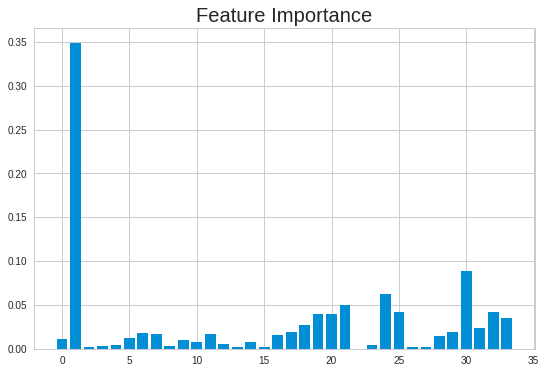

In [51]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.title('Feature Importance')
plt.show()

In [52]:
probabilities = gbr.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      3022               365
Actual negative       638              1000

Accuracy        0.80
AUC             0.86
Macro precision 0.78
Macro recall    0.75
 
           Positive      Negative
Num case     3387          1638
Precision    0.83          0.73
Recall       0.89          0.61
F1           0.86          0.67


In [53]:
solution=gbr.predict(test1)
my_submission=pd.DataFrame({'CustomerID':df_test.CustomerID,'BikeBuyer': solution})
my_submission.to_csv('GradientBoostingMicrosoft01.csv', index=False)
#np.savetxt('GradientBoostingMicrosoft01.csv', solution, delimiter=',')